# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수, 
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [27]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [28]:
sales = pd.read_csv("product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [29]:
print(sales.shape) 
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


# 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [30]:
#모델 생성
kmeans = KMeans(n_clusters=3, init = 'k-means++', random_state=1)

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [31]:
pred = kmeans.fit_predict(sales)

2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [32]:
sales['cluster']=pred

# 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [33]:
salesDF = sales.drop(columns='cluster')
salesDF

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5
3,5.2,0.2,3.0,1.4
4,4.7,0.2,3.2,1.6
...,...,...,...,...
145,5.4,0.2,3.4,1.7
146,5.1,0.4,2.0,1.5
147,4.6,0.2,3.6,1.0
148,5.1,0.5,3.3,1.7


3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [34]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(salesDF)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x']= pca_transformed[:,0]
sales['pca_y']= pca_transformed[:,1]

3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

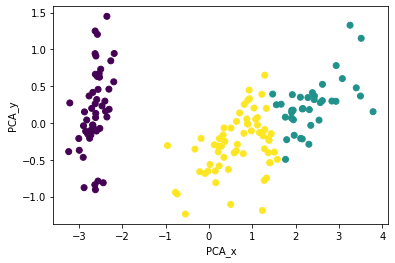

In [48]:
plt.scatter(x=sales['pca_x'],y=sales['pca_y'],c=sales['cluster'] )
plt.xlabel('PCA_x')
plt.ylabel('PCA_y')

plt.show()

# 4) 군집평가: 실루엣 계수 구하기

In [18]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [20]:
# sales의 모든 데이터에 실루엣 계수 구하기
score = silhouette_samples(sales_data, sales['cluster'])
score

array([0.79112928, 0.80339312, 0.80745367, 0.78880536, 0.80070215,
       0.80228142, 0.74329723, 0.72294854, 0.68429035, 0.81317965,
       0.8150492 , 0.76597452, 0.81317965, 0.76253896, 0.81967084,
       0.81645784, 0.65979098, 0.77318707, 0.76810436, 0.70752222,
       0.80201832, 0.77274376, 0.80322804, 0.78011482, 0.82756725,
       0.03010966, 0.38588964, 0.03550432, 0.59090953, 0.37118045,
       0.59218597, 0.36551714, 0.25291941, 0.34664988, 0.57771726,
       0.35984201, 0.58908336, 0.54842372, 0.48526634, 0.56405686,
       0.32785615, 0.55790518, 0.61041698, 0.49945776, 0.61027416,
       0.3294748 , 0.59038923, 0.30806081, 0.47510801, 0.50262933,
       0.38872071, 0.1263622 , 0.11662093, 0.55566018, 0.50304225,
       0.59300633, 0.55485078, 0.61942931, 0.25930188, 0.54056538,
       0.41885967, 0.17026149, 0.48518425, 0.60814469, 0.61300588,
       0.59447333, 0.50822278, 0.62357199, 0.27942676, 0.62700595,
       0.6078571 , 0.6228141 , 0.56045218, 0.05927744, 0.63081

In [21]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_coeff']=score

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [22]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
average_score = silhouette_score(sales_data, sales['cluster'])
average_score

0.538044239952023

4-3) 군집별 평균 실루엣 계수를 구하세요.

In [23]:
#군집별 평균 실루엣 계수 구하기
sales.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.755123
1    0.450677
2    0.416528
Name: silhouette_coeff, dtype: float64